In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests, re
from wordcloud import WordCloud

In [3]:
# matplotlib 한글화
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [4]:
from konlpy.tag import Okt
okt = Okt()

In [47]:
df_word = pd.read_excel('./감성사전_편집 (1).xlsx')
df_word.set_index('Unnamed: 0', drop=True, inplace=True)
std_df = pd.read_csv('./stopwords-ko.txt')

In [63]:
df_word.loc['정신']

슬픔     0
분노     0
기쁨     0
긴장감    0
무서운    0
증오     0
차분히    0
섹시     0
브릿락    0
설렘     0
몽환     1
Name: 정신, dtype: int64

In [61]:
df_word.columns(df_word.loc['정신'] == 1)

TypeError: 'Index' object is not callable

In [48]:
def novel_score_extract(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    text = soup.select('div.detail_view_content')[0].text
    text = ' '.join(re.compile('[ㄱ-ㅎ가-힣]+').findall(text))

    okt = Okt()
    okt_li = okt.morphs(text)
    globals()['word_li'] = [i for i in okt_li if len(i) >= 2]
    #word_li = [i for i in word_li if i not in std_df ]
    


    
    
    
    mood_count = {'슬픔': 0,
    '분노': 0,
    '기쁨': 0,
    '긴장감': 0,
    '무서운': 0,
    '증오': 0,
    '차분히': 0,
    '섹시': 0,
    '브릿락': 0,
    '설렘': 0,
    '몽환': 0}
    mood_words = {}

    for word in word_li:
        if word in df_word.index:
            word_mood = df_word.columns[df_word.loc[word, :] == 1].values[0]
            if word_mood in mood_words:
                mood_count[word_mood] += 1
                mood_words[word_mood].append(word)
            else:
                mood_count[word_mood] += 1
                mood_words[word_mood] =[word]
    for mood in mood_words.keys():
        mood_words[mood] = set(mood_words[mood])

    novel_score = list(mood_count.values())
    return novel_score

In [49]:
df_emotion = pd.read_csv('./노래별감성점수_최종.csv')
df_emotion

,Unnamed: 0,노래,가수,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
0,0,사랑은 늘 도망가,임영웅,9,0,0,1,0,0,0,2,0,11,4
1,1,코 끝이 찡하게,차가을,8,0,1,0,0,0,0,0,1,4,1
2,2,혼자 사랑하고 미워해,백예슬,7,1,1,0,0,2,0,2,0,6,0
3,3,비 오는 날 듣기 좋은 노래 (Feat. Colde),에픽하이 (EPIK HIGH),19,2,5,2,0,3,1,1,0,5,0
4,4,Your Lights,이수 (엠씨더맥스),6,0,2,0,0,2,0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,476,Faded,Alan Walker,0,0,0,0,0,0,0,0,0,0,5
477,477,혼자라는 느낌,이상은 (=Lee-tzsche),5,0,0,2,0,1,0,4,0,2,7
478,478,재와 연기의 노래,못 (Mot),4,0,2,0,0,0,0,0,4,0,7
479,479,Scenery,Ashmute (애쉬뮤트),10,0,0,0,0,0,0,0,0,0,5


In [50]:
emotion = df_emotion.drop(['Unnamed: 0', '노래', '가수'], axis=1)
emotion

,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
0,9,0,0,1,0,0,0,2,0,11,4
1,8,0,1,0,0,0,0,0,1,4,1
2,7,1,1,0,0,2,0,2,0,6,0
3,19,2,5,2,0,3,1,1,0,5,0
4,6,0,2,0,0,2,0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
476,0,0,0,0,0,0,0,0,0,0,5
477,5,0,0,2,0,1,0,4,0,2,7
478,4,0,2,0,0,0,0,0,4,0,7
479,10,0,0,0,0,0,0,0,0,0,5


In [51]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

In [52]:
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [64]:
def search_similarity(a):
    similarity_li = []
    for i in range(len(emotion)):
        b = emotion.iloc[i, :].values
        similarity_li.append(cosine_similarity(a, b))
        num = np.argmax(similarity_li)
    print("소설와 가장 유사한 음악의 감정 점수 :\n", emotion.loc[num])
    
    song_score = df_emotion.iloc[np.argmax(similarity_li), 3:].values
    title = df_emotion.iloc[np.argmax(similarity_li), 1]
    singer = df_emotion.iloc[np.argmax(similarity_li), 2]
    return f"{singer} - {title}", song_score
url = 'https://novel.naver.com/webnovel/detail?novelId=1002530&volumeNo=102'
novel_score = novel_score_extract(url)
music, song_score = search_similarity(novel_score)

print("소설과 가장 잘 맞는 노래: ", music)
print("소설의 감정 점수:",novel_score)

소설와 가장 유사한 음악의 감정 점수 :
 슬픔     5
분노     5
기쁨     6
긴장감    1
무서운    4
증오     0
차분히    0
섹시     1
브릿락    0
설렘     0
몽환     3
Name: 105, dtype: int64
소설과 가장 잘 맞는 노래:  ATEEZ (에이티즈) - 야간비행 (Turbulence)
소설의 감정 점수: [20, 18, 22, 17, 13, 6, 2, 6, 3, 3, 20]


In [ ]:
a = [20, 18, 22, 17, 13, 6, 2, 6, 3, 3, 20]
b = [5, 5, 6, 1, 4, 0, 0, 1, 0, 0, 3]

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

In [ ]:
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

#### 로맨스

In [255]:
a = [5, 1, 13, 9, 0, 2, 2, 14, 1, 7, 15]
b = [1, 1, 6, 2, 0, 1, 0, 4, 0, 3, 2]
cosine_similarity(a, b)

0.9049878139183377

In [259]:

x = np.array((5, 1, 13, 9, 0, 2, 2, 14, 1, 7, 15))
y = np.array((1, 1, 6, 2, 0, 1, 0, 4, 0, 3, 2))
dist(x,y)

20.12461179749811

In [1]:
# 판타지

In [65]:
a = [20, 18, 22, 17, 13, 6, 2, 6, 3, 3, 20]
b = [5, 5, 6, 1, 4, 0, 0, 1, 0, 0, 3]
cosine_similarity(a, b)

0.9250178273902829

In [66]:
x = np.array((20, 18, 22, 17, 13, 6, 2, 6, 3, 3, 20))
y = np.array((5, 5, 6, 1, 4, 0, 0, 1, 0, 0, 3))
dist(x,y)

36.864617182333525

In [ ]:
# 무협 

In [30]:
a = [9, 9, 7, 14, 3, 6, 7, 5, 4, 6, 11]
b = [3, 2, 2, 4, 1, 2, 0, 2, 5, 3, 1]
cosine_similarity(a, b)

0.8146627402880149

In [31]:
x = np.array((9, 9, 7, 14, 3, 6, 7, 5, 4, 6, 11))
y = np.array((3, 2, 2, 4, 1, 2, 0, 2, 5, 3, 1))
dist(x,y)

19.949937343260004

In [ ]:
# 현대

In [36]:
a = [18, 5, 16, 24, 1, 3, 3, 9, 3, 4, 8]
b = [3, 1, 2, 5, 1, 0, 0, 3, 2, 1, 0]
cosine_similarity(a, b)

0.9154659244782292

In [37]:
x = np.array((18, 5, 16, 24, 1, 3, 3, 9, 3, 4, 8))
y = np.array((3, 1, 2, 5, 1, 0, 0, 3, 2, 1, 0))
dist(x,y)

30.430248109405877

In [211]:
# 로맨스 https://novel.naver.com/webnovel/detail?novelId=994958&volumeNo=2
# 판타지 https://novel.naver.com/webnovel/detail?novelId=1002530&volumeNo=102
# 무협 https://novel.naver.com/webnovel/detail?novelId=927909&volumeNo=114
# 현대 https://novel.naver.com/webnovel/detail?novelId=920928&volumeNo=1

In [242]:
# word_counts = {}
# for i in word_li:
#     if i in word_counts:
#         word_counts[i] += 1
#     else:
#         word_counts[i] = 1

# sorted(word_counts.items(), key = lambda item: item[1], reverse=True)

[('건일', 38),
 ('방수희', 24),
 ('으로', 16),
 ('했다', 11),
 ('골프', 11),
 ('이야', 11),
 ('내기', 10),
 ('머리카락', 10),
 ('드라이버', 10),
 ('조금', 8),
 ('장타', 7),
 ('좋아', 7),
 ('거야', 7),
 ('에서', 7),
 ('웃었다', 6),
 ('하는', 6),
 ('여자', 6),
 ('삭발', 6),
 ('검사', 6),
 ('있어', 5),
 ('어때', 5),
 ('있다', 5),
 ('표정', 5),
 ('생각', 5),
 ('친구', 5),
 ('그럼', 5),
 ('이다', 5),
 ('하지만', 5),
 ('윤해성', 5),
 ('그린', 5),
 ('스포츠', 4),
 ('하면', 4),
 ('먼저', 4),
 ('가지', 4),
 ('고개', 4),
 ('한테', 4),
 ('이기', 4),
 ('정도', 4),
 ('해서', 4),
 ('그런', 4),
 ('하지', 4),
 ('아냐', 4),
 ('머리', 4),
 ('이어', 4),
 ('유전자', 4),
 ('장유나', 4),
 ('남자', 4),
 ('소리', 4),
 ('야드', 4),
 ('그것', 3),
 ('좋지', 3),
 ('자신', 3),
 ('물론', 3),
 ('하고', 3),
 ('이야기', 3),
 ('웃음', 3),
 ('이었다', 3),
 ('조건', 3),
 ('역시', 3),
 ('이길', 3),
 ('있었다', 3),
 ('프로', 3),
 ('골퍼', 3),
 ('사람', 3),
 ('혹시', 3),
 ('유언', 3),
 ('묻은', 3),
 ('에는', 3),
 ('마지막', 3),
 ('위잉', 3),
 ('타석', 3),
 ('라도', 2),
 ('정말', 2),
 ('격투기', 2),
 ('어떤', 2),
 ('정보', 2),
 ('이미', 2),
 ('하더니', 2),
 ('하다가', 2),
 ('했지만', 2),
 ('관심', 2),


In [54]:
# 단어별 개수

counter={}
for i in word_li:
    for j in df_word.index:
        if i == j:
            if i in counter:
                counter[i] += 1
            else:
                counter[i] = 1

In [55]:
counter

{'부정': 1,
 '망할': 1,
 '짜증': 1,
 '폭발': 1,
 '괴물': 3,
 '바다': 3,
 '정신': 5,
 '죽인': 2,
 '무너지게': 1,
 '비장': 1,
 '공격': 5,
 '움찔': 3,
 '당황': 1,
 '이익': 1,
 '타격': 1,
 '위력': 1,
 '망설이는': 1,
 '용기': 1,
 '열정': 1,
 '놀라': 1,
 '미친': 2,
 '절망': 1,
 '재앙': 1,
 '덤벼': 1,
 '악착같이': 1,
 '싸우는': 1,
 '중요한': 2,
 '힘들다': 1,
 '파괴': 1,
 '바람': 1,
 '귀한': 1,
 '어렵다': 1,
 '빨리': 1,
 '공포': 5,
 '제일': 1,
 '해결': 1,
 '아픈': 1,
 '저주': 1,
 '의식': 3,
 '결심': 1,
 '심장': 2,
 '조심': 1,
 '버리고': 1,
 '탐욕': 1,
 '놀랄': 1,
 '감정': 4,
 '놀라서': 1,
 '급히': 1,
 '신경': 1,
 '떨렸다': 1,
 '포기': 1,
 '완성': 1,
 '혼란': 1,
 '피해': 1,
 '불구': 2,
 '거짓말': 1,
 '사라져': 1,
 '성공한': 1,
 '안도': 1,
 '한숨': 1,
 '딱딱한': 1,
 '허망': 1,
 '실패': 1,
 '빌어먹을': 1,
 '안색': 1,
 '없다': 1,
 '깨진': 1,
 '자랑': 1,
 '문제': 2,
 '맞아': 1,
 '가슴': 1,
 '승리': 1,
 '불행': 1,
 '한계': 1,
 '특별한': 1,
 '흔들리는': 1,
 '걱정': 1,
 '자는': 1,
 '놀랍게도': 1,
 '영웅': 1,
 '고집': 1,
 '간직': 1,
 '솜씨': 1,
 '말쑥한': 1,
 '독한': 1,
 '끔찍한': 1,
 '도움': 1,
 '정상': 2,
 '젊은': 2,
 '위험': 1,
 '빠진': 1,
 '황천': 1,
 '친절한': 1,
 '싫을': 1,
 '친한': 1,
 '싸가지': 1,
 '새끼': 1,
 '

In [19]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] ="AppleGothic"
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] =False

In [58]:
df

NameError: name 'df' is not defined

In [20]:
bar_label = df_emotion.columns[3:].values
index = np.arange(len(bar_label))

# 로맨스

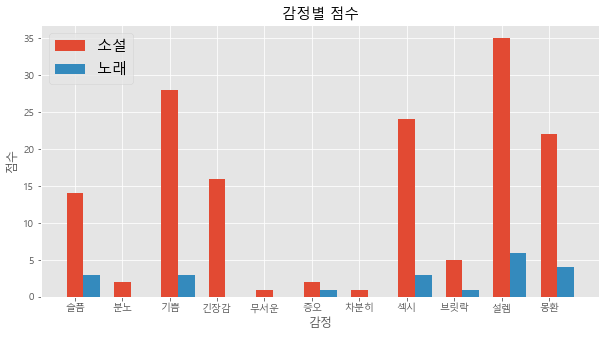

In [169]:
plt.figure(figsize=(10, 5))
plt.title('감정별 점수')
plt.xlabel('감정')
plt.ylabel('점수')
plt.grid(True)
plt.style.use ('ggplot')
p1 = plt.bar(index, novel_score, 0.35)
p2 = plt.bar(index + 0.35, song_score, 0.35)
plt.xticks(index, bar_label)
plt.legend((p1[0], p2[0]), ('소설', '노래'), fontsize=15)

In [26]:
from collections import Counter
from PIL import Image

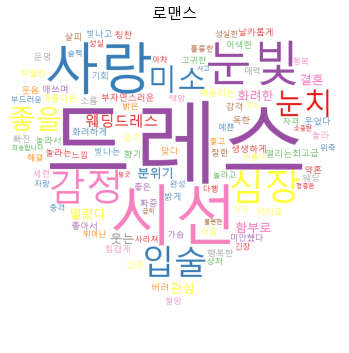

In [170]:
im = Image.open('./heart.png') 
mask_arr = np.array(im) 
wordcloud = WordCloud(background_color ='white', colormap='Set1', font_path='malgun',
                      width = 400, height = 400, random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(counter)
plt.figure(figsize = (6, 6))  
plt.imshow(wordcloud)
plt.title("로맨스", size = 15)
plt.axis('off')
plt.show()

# 판타지

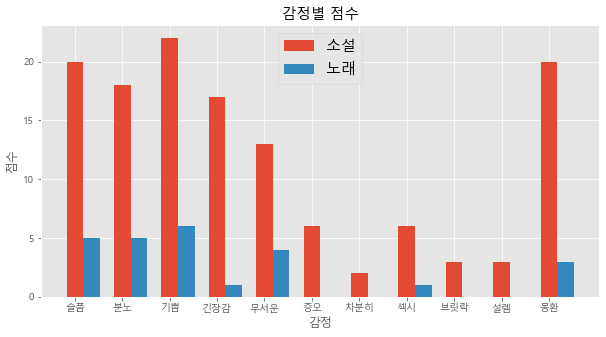

In [56]:
plt.figure(figsize=(10, 5))
plt.title('감정별 점수')
plt.xlabel('감정')
plt.ylabel('점수')
plt.grid(True)
plt.style.use ('ggplot')
p1 = plt.bar(index, novel_score, 0.35)
p2 = plt.bar(index + 0.35, song_score, 0.35)
plt.xticks(index, bar_label)
plt.legend((p1[0], p2[0]), ('소설', '노래'), fontsize=15)

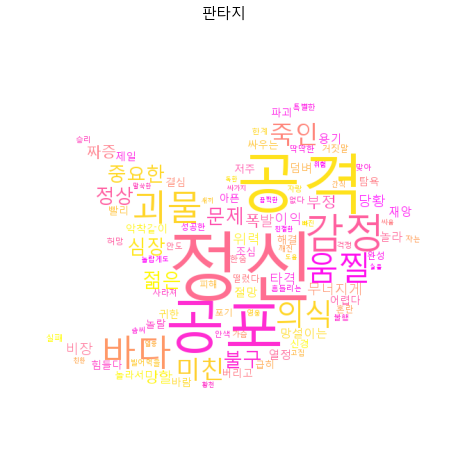

In [57]:
im = Image.open('./bird.jpg') 
mask_arr = np.array(im) 
wordcloud = WordCloud(background_color ='white', colormap='spring', font_path='malgun',
                      width = 300, height = 300, random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(counter)
plt.figure(figsize = (8, 8))  
plt.imshow(wordcloud)
plt.title("판타지", size = 15)
plt.axis('off')
plt.show()

In [25]:
im = Image.open('./bird.jpg') 

NameError: name 'Image' is not defined

# 무협

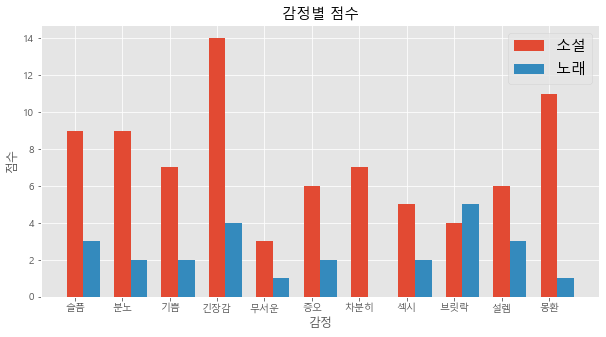

In [187]:
plt.figure(figsize=(10, 5))
plt.title('감정별 점수')
plt.xlabel('감정')
plt.ylabel('점수')
plt.grid(True)
plt.style.use ('ggplot')
p1 = plt.bar(index, novel_score, 0.35)
p2 = plt.bar(index + 0.35, song_score, 0.35)
plt.xticks(index, bar_label)
plt.legend((p1[0], p2[0]), ('소설', '노래'), fontsize=15)

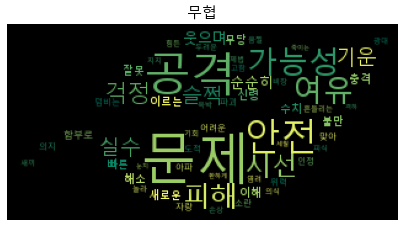

In [188]:
im = Image.open('./leaf.png') 
mask_arr = np.array(im) 
wordcloud = WordCloud(background_color ='black', colormap='summer', font_path='malgun',
                      width = 200, height = 200, random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(counter)
plt.figure(figsize = (7, 7))  
plt.imshow(wordcloud)
plt.title("무협", size = 15)
plt.axis('off')
plt.show()

# 미스터리

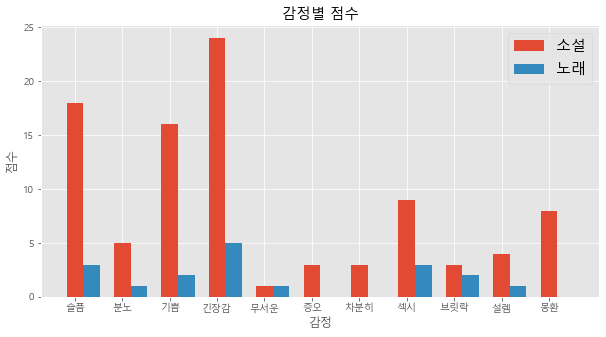

In [45]:
plt.figure(figsize=(10, 5))
plt.title('감정별 점수')
plt.xlabel('감정')
plt.ylabel('점수')
plt.grid(True)
plt.style.use ('ggplot')
p1 = plt.bar(index, novel_score, 0.35)
p2 = plt.bar(index + 0.35, song_score, 0.35)
plt.xticks(index, bar_label)
plt.legend((p1[0], p2[0]), ('소설', '노래'), fontsize=15)

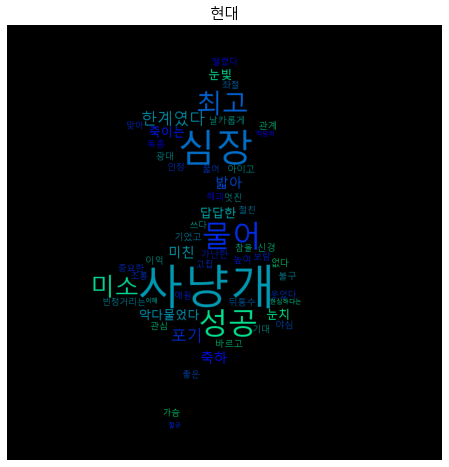

In [46]:
im = Image.open('./alice_mask.png') 
mask_arr = np.array(im) 
wordcloud = WordCloud(background_color ='black', colormap='winter', font_path='malgun',
                      width = 300, height = 300, random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(counter)
plt.figure(figsize = (8, 8))  
plt.imshow(wordcloud)
plt.title("현대", size = 15)
plt.axis('off')
plt.show()

In [23]:
# matplotlib 한글화
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)